In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv(r"D:\CSV Files\fraud_detection_dataset.csv")
print("✅ Dataset Loaded Successfully!")
df.head()


✅ Dataset Loaded Successfully!


,transaction_id,customer_id,transaction_datetime,transaction_amount,merchant_id,merchant_category,payment_method,customer_age,customer_gender,customer_location,...,ip_risk_score,browser_type,transaction_type,account_type,loan_active_flag,credit_score,monthly_income,previous_fraud_count,transaction_hour,is_fraud
0,TXN_015651,CUST_7683,2025-01-06 02:01:29,79.12,M802,Fuel,NetBanking,26.0,Other,Chennai,...,NaN,Chrome,Online,Credit,0,504.0,50380.36,0,2,0
1,TXN_018896,CUST_4228,2025-09-29 22:48:32,3301.18,M970,Grocery,UPI,42.0,Female,Bangalore,...,0.884,Firefox,Online,Current,0,667.0,48503.34,1,22,0
2,TXN_019356,CUST_8801,2024-07-21 12:30:29,5574.78,M696,Electronics,Wallet,27.0,Female,Kolkata,...,0.340,Chrome,POS,Savings,1,631.0,66121.81,0,12,0
3,TXN_017514,CUST_2641,2023-04-07 09:43:27,2363.77,M149,Electronics,UPI,56.0,Male,Hyderabad,...,0.548,Edge,ATM,Current,1,673.0,57074.34,0,9,0
4,TXN_018903,CUST_8530,2023-05-23 08:53:12,7648.01,M356,Travel,Credit Card,46.0,Male,Mumbai,...,0.794,Firefox,POS,Current,1,644.0,83979.78,1,8,0


In [ ]:
print(df.shape)
print(df.info())
print(df.isnull().sum())
print(df.duplicated().sum())
df.describe()

(20600, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20600 entries, 0 to 20599
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   transaction_id                 18968 non-null  object 
 1   customer_id                    20600 non-null  object 
 2   transaction_datetime           20600 non-null  object 
 3   transaction_amount             20600 non-null  float64
 4   merchant_id                    20600 non-null  object 
 5   merchant_category              20600 non-null  object 
 6   payment_method                 20600 non-null  object 
 7   customer_age                   18946 non-null  float64
 8   customer_gender                20600 non-null  object 
 9   customer_location              20600 non-null  object 
 10  device_type                    20600 non-null  object 
 11  is_international               18946 non-null  float64
 12  account_balance_before         206

,transaction_amount,customer_age,is_international,account_balance_before,account_balance_after,failed_transaction_count_24h,average_transaction_amount_7d,ip_risk_score,loan_active_flag,credit_score,monthly_income,previous_fraud_count,transaction_hour,is_fraud
count,20600.000000,18946.000000,18946.000000,20600.000000,18948.000000,20600.000000,20600.000000,18939.000000,20600.000000,20600.000000,20600.000000,20600.000000,20600.000000,20600.000000
mean,3889.597108,43.597593,0.079120,50091.826022,47099.922701,1.005146,2511.195439,0.504189,0.248835,650.585255,61340.554397,0.198592,11.507379,0.007427
std,9884.027623,14.897464,0.269932,19937.006463,20174.473154,1.008182,991.582302,0.289618,0.432348,70.339431,22494.341928,0.443001,6.891871,0.085863
min,0.030000,18.000000,0.000000,-25652.310000,-35166.690000,0.000000,-1444.600000,0.000000,0.000000,387.000000,10000.000000,0.000000,0.000000,0.000000
25%,884.295000,31.000000,0.000000,36809.205000,33733.132500,0.000000,1845.067500,0.251000,0.000000,603.000000,46828.512500,0.000000,6.000000,0.000000
50%,2127.190000,44.000000,0.000000,50202.890000,47245.475000,1.000000,2500.175000,0.505000,0.000000,650.000000,60406.905000,0.000000,11.000000,0.000000
75%,4303.932500,56.000000,0.000000,63513.950000,60675.160000,2.000000,3165.800000,0.753500,0.000000,698.000000,74168.077500,0.000000,17.000000,0.000000
max,303632.550000,69.000000,1.000000,134040.520000,131687.790000,7.000000,6727.140000,1.000000,1.000000,865.107513,232752.809132,4.000000,23.000000,1.000000


In [ ]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.drop_duplicates(inplace=True)
print("✅ Data Cleaned Successfully!")

✅ Data Cleaned Successfully!


In [ ]:
import os

# Create a 'data' folder if it doesn’t exist
os.makedirs("data", exist_ok=True)

# Save the cleaned dataset
df.to_csv("data/clean_data.csv", index=False)

print("✅ Cleaned data saved successfully as data/clean_data.csv")



✅ Cleaned data saved successfully as data/clean_data.csv


In [ ]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.drop_duplicates(inplace=True)
print("✅ Data Cleaned Successfully!")


✅ Data Cleaned Successfully!


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("✅ Categorical Encoding Done!")


✅ Categorical Encoding Done!


X = df.drop(columns=['is_fraud'])
y = df['is_fraud']


In [ ]:
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)
print("✅ Applied SMOTE: Balanced Fraud & Non-Fraud classes!")


✅ Applied SMOTE: Balanced Fraud & Non-Fraud classes!


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)


(31755, 25) (7939, 25)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("✅ Feature Scaling Completed.")


✅ Feature Scaling Completed.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(kernel='rbf', probability=True)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc*100:.2f}%")

best_model_name = max(results, key=results.get)
print(f"\n🏆 Best Model: {best_model_name} with Accuracy: {results[best_model_name]*100:.2f}%")


Logistic Regression Accuracy: 84.28%
Random Forest Accuracy: 99.47%
Gradient Boosting Accuracy: 95.23%
XGBoost Accuracy: 99.47%


In [ ]:
import os
import joblib

# Create folder if not exists
os.makedirs("model", exist_ok=True)

# Save the FULL preprocessing + model pipeline
joblib.dump(best_model, "model/fraud_pipeline.pkl")

print("✅ Saved: model/fraud_pipeline.pkl")

✅ Saved: model/fraud_pipeline.pkl


In [ ]:
import joblib

best_model = models[best_model_name]
joblib.dump(best_model, "fraud_pipeline"
".pkl")
print("✅ Best Model Saved as fraud_detection_model.pkl")


✅ Best Model Saved as fraud_detection_model.pkl



📊 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3970
           1       1.00      0.99      0.99      3969

    accuracy                           0.99      7939
   macro avg       0.99      0.99      0.99      7939
weighted avg       0.99      0.99      0.99      7939

ROC-AUC Score: 0.9947095341541785


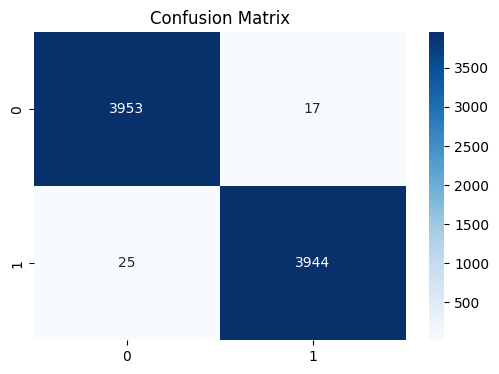

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = best_model.predict(X_test)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

plt.figure(figsize=(6,4))
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
best_pipeline = pipelines[best_model_name]  # pick the top model pipeline
best_pipeline.fit(X_train, y_train)

import os, joblib
os.makedirs("model", exist_ok=True)
joblib.dump(best_pipeline, "model/fraud_pipeline.pkl")
print("✅ Saved full model pipeline")

NameError: name 'pipelines' is not defined